Q1. Use _rejection sampling_ to draw 1000 samples from this distribution.  Show that the samples you've drawn are correctly distributed according to this probability density function.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


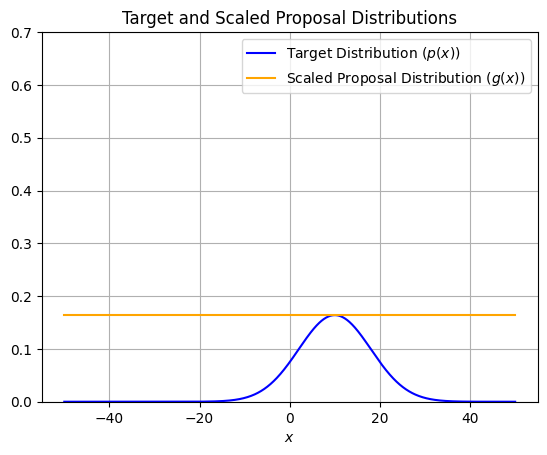

In [2]:
def pdf(x, mu=10, sigma=8):
    return 0.164 * np.exp(-(x - mu)**2 / (2 * sigma**2))

mu, sigma = 10, 8
def p(x):
    return pdf(x, mu=mu, sigma=sigma)

def g(x):
    return np.ones_like(x)  #uniform distribution

x = np.linspace(-50, 50, 1000)
k = max(p(x) / g(x)) 

def rejection_sampling(iter=1000):
    samples = []
    while len(samples) < iter:
        z = np.random.uniform(-50, 50) 
        u = np.random.uniform(0, k * g(z)) 

        if u <= p(z):
            samples.append(z)

    return np.array(samples)

plt.plot(x, p(x), label='Target Distribution ($p(x)$)', color='blue')
plt.plot(x, k * g(x), label='Scaled Proposal Distribution ($g(x)$)', color='orange')
plt.ylim(0, 0.7)
plt.legend()
plt.xlabel('$x$')
plt.title('Target and Scaled Proposal Distributions')
plt.grid()
plt.show()



1000 samples drawn from target distribution


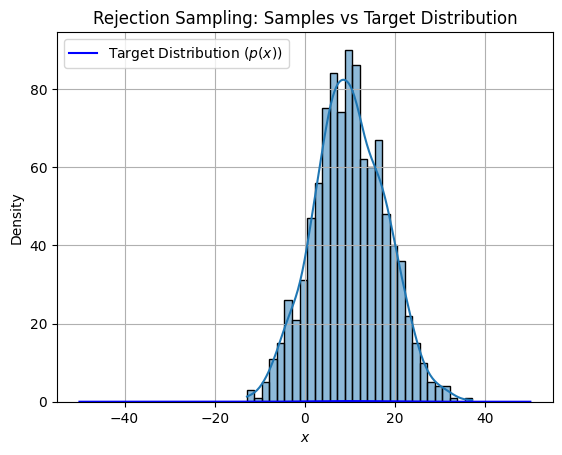

In [3]:
s = rejection_sampling(iter=1000)
print(f"{len(s)} samples drawn from target distribution")

sns.histplot(s, bins=30, kde=True)
plt.plot(x, p(x), label='Target Distribution ($p(x)$)', color='blue')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.title('Rejection Sampling: Samples vs Target Distribution')
plt.legend()
plt.grid()
plt.show()


Q2. Use _importance sampling_ to estimate the expectation value of $x$, and compare it to the mean of the samples you drew in part 1.

In [4]:
from scipy.stats import norm

In [5]:
mu, sigma = 10, 8
def pdf(x, mu=mu, sigma=sigma):
    return 0.164 * np.exp(-(x - mu)**2 / (2 * sigma**2))

def q(x):
    return p(x)

μ_g = mu
σ_g = 3 * sigma
X_g = norm(loc=μ_g, scale=σ_g)

S = 10000
x_gs = X_g.rvs(S)
ws = q(x_gs) / X_g.pdf(x_gs)

E_x = np.sum(x_gs * ws) / np.sum(ws)
print(E_x)


9.911824130858193


In [6]:
np.mean(s)

9.91070611564436

Q3. Calculate the expectation value of $x^2$.

In [7]:
mu, sigma = 10, 8
def pdf(x, mu=mu, sigma=sigma):
    return 0.164 * np.exp(-(x - mu)**2 / (2 * sigma**2))
def q(x):
    return p(x)

μ_g = mu
σ_g = 3 * sigma
X_g = norm(loc=μ_g, scale=σ_g)

S = 10000
x_gs = X_g.rvs(S)
ws = q(x_gs) / X_g.pdf(x_gs)
def h(x):
    return x**2

In [8]:
E_x2 = np.sum(h(x_gs) * ws) / np.sum(ws)
print(E_x2)

168.20820843526545


Q5. Revisit the importance sampling example from the Intro to Sampling notebook from class.  There we demonstrated the use of importance sampling to estimate the expectation value of some function of our random variable.  We could also use the weights we computed to probabilistically choose samples from the sampling distribution to keep, in an effort to "reweigh" the sampling distribution to correspond to the target distribution.  Try to implement this, and see if your resampled distribution's histogram matches the target distribution's probability density function.

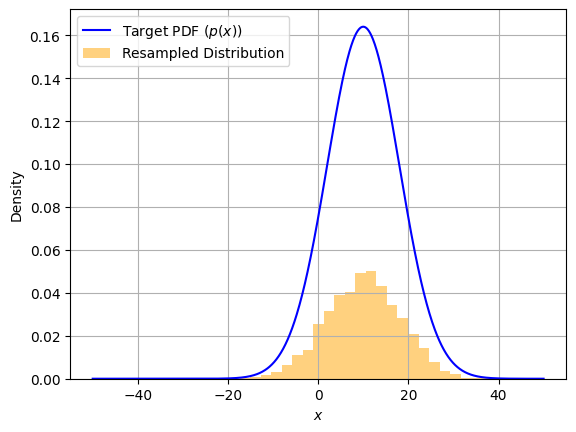

In [9]:
ws = q(x_gs) / X_g.pdf(x_gs)
ws /= np.sum(ws)
resampled_samples = np.random.choice(x_gs, size=S, p=ws)

x = np.linspace(-50, 50, 1000) 

plt.plot(x, pdf(x), label='Target PDF ($p(x)$)', color='blue')
plt.hist(resampled_samples, bins=30, density=True, alpha=0.5, color='orange', label='Resampled Distribution')

plt.xlabel('$x$')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


In [10]:
#from class

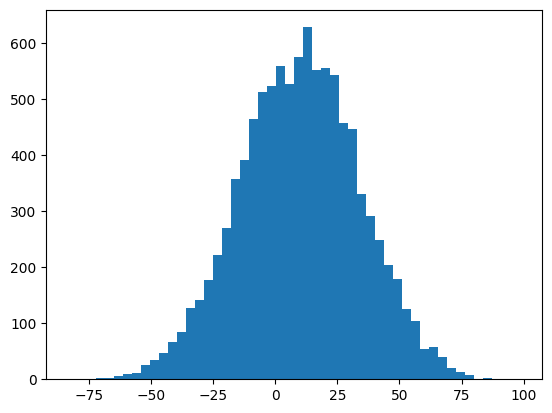

In [11]:
plt.hist(x_gs, bins=50);

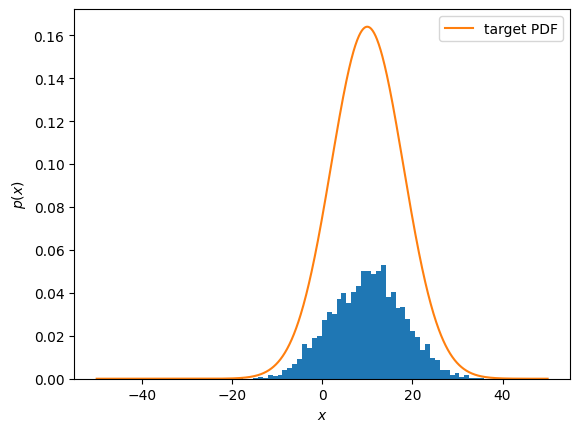

In [12]:
w_max = np.max(ws)
sel = np.random.uniform(0, w_max, S) < ws
plt.hist(x_gs[sel], bins=50, density=True);
plt.plot(x, p(x), label='target PDF')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$p(x)$');